<a href="https://colab.research.google.com/github/Georgiiliwe8pcr/11tehwst/blob/main/GoIT_HW_8_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Створення нейронної мережі

У цьому завданні ми створимо повнозв'язну нейронну мережу, використовуючи при цьому низькорівневі механізми tensorflow.

Архітектура нейромережі представлена на наступному малюнку. Як бачиш, у ній є один вхідний шар, два приховані, а також вихідний шар. В якості активаційної функції у прихованих шарах буде використовуватись сигмоїда. На вихідному шарі ми використовуємо softmax.

Частина коду зі створення мережі вже написана, тобі потрібно заповнити пропуски у вказаних місцях.

## Архітектура нейронної мережі

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## Про датасет MNIST

Дану нейромережу ми будемо вивчати на датасеті MNIST. Цей датасет являє собою велику кількість зображень рукописних цифр розміром $28 \times 28$ пікселів. Кожен піксель приймає значення від 0 до 255.

Як і раніше, датасет буде розділений на навчальну та тестову вибірки. При цьому ми виконаємо нормалізацію всіх зображень, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.

Окрім того, архітектура нейронної мережі очікує на вхід вектор. У нашому ж випадку кожен об'єкт вибірки являє собою матрицю. Що ж робити? У цьому завданні ми "розтягнемо" матрицю $28 \times 28$, отримавши при цьому вектор, що складається з 784 елементів.

![MNIST Dataset](https://www.researchgate.net/profile/Steven-Young-5/publication/306056875/figure/fig1/AS:393921575309346@1470929630835/Example-images-from-the-MNIST-dataset.png)

Більше інформації про датасет можна знайти [тут](http://yann.lecun.com/exdb/mnist/).

In [1]:
pip install tensorflow numpy matplotlib scikit-learn


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Step 100, Loss: 9.5903, Accuracy: 0.1250
Step 200, Loss: 9.4380, Accuracy: 0.1016
Step 300, Loss: 9.4046, Accuracy: 0.1211
Step 400, Loss: 9.1430, Accuracy: 0.1133
Step 500, Loss: 8.5451, Accuracy: 0.1484
Step 600, Loss: 7.3606, Accuracy: 0.2070
Step 700, Loss: 7.1960, Accuracy: 0.1680
Step 800, Loss: 7.4567, Accuracy: 0.1602
Step 900, Loss: 6.9589, Accuracy: 0.1289
Step 1000, Loss: 6.8908, Accuracy: 0.1992
Step 1100, Loss: 7.3422, Accuracy: 0.2227
Step 1200, Loss: 7.2149, Accuracy: 0.1953
Step 1300, Loss: 6.9200, Accuracy: 0.2070
Step 1400, Loss: 7.0345, Accuracy: 0.1875
Step 1500, Loss: 7.1489, Accuracy: 0.1836
Step 1600, Loss: 7.0981, Accuracy: 0.2188
Step 1700, Loss: 6.2481, Accuracy: 0.2266
Step 1800, Loss: 6.3472, Accuracy: 0.2148
Step 1900, Loss: 5.7355, Accuracy: 0.3008
Step 2000, Loss: 5.8494, Accuracy: 0.2383
Step 2100, Loss: 6.2482, Accuracy: 0.2031
Step 2200, Loss: 5.6230, Accuracy: 0.2734
Step 2300, Loss: 6.8794, Accuracy:

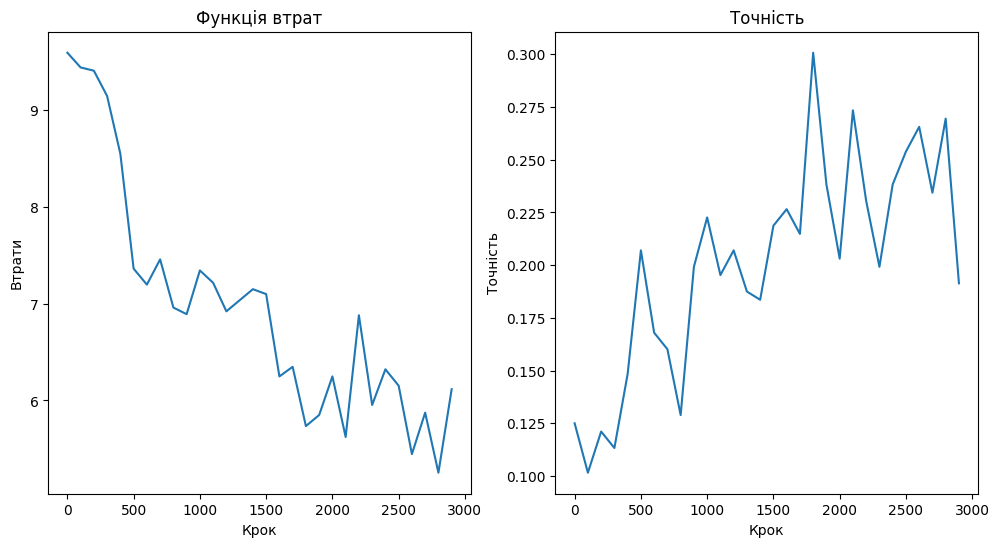

Точність на тестових даних: 0.2694
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.66      0.68      0.67      1135
           2       0.21      0.21      0.21      1032
           3       0.22      0.23      0.23      1010
           4       0.27      0.30      0.28       982
           5       0.17      0.19      0.18       892
           6       0.23      0.26      0.24       958
           7       0.35      0.42      0.38      1028
           8       0.19      0.22      0.20       974
           9       0.09      0.11      0.10      1009

    accuracy                           0.27     10000
   macro avg       0.24      0.26      0.25     10000
weighted avg       0.25      0.27      0.26     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


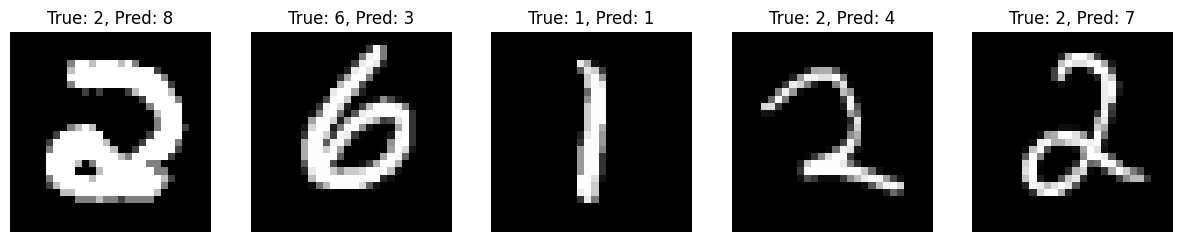

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from sklearn.metrics import classification_report

# Параметри моделі
num_classes = 10
num_features = 784

learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100

n_hidden_1 = 128
n_hidden_2 = 256

# Завантаження і підготовка датасету
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]) / 255., x_test.reshape([-1, num_features]) / 255.

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).repeat().shuffle(5000).batch(batch_size).prefetch(1)

# Оголошення шарів та архітектури нейронної мережі
class DenseLayer(tf.Module):
    def __init__(self, in_features, out_features, name=None):
        super().__init__(name=name)
        self.w = tf.Variable(tf.random.normal([in_features, out_features]), name="w")
        self.b = tf.Variable(tf.zeros([out_features]), name="b")

    def __call__(self, x, activation=None):
        y = tf.matmul(x, self.w) + self.b
        if activation == 'softmax':
            return tf.nn.softmax(y)
        elif activation == 'sigmoid':
            return tf.nn.sigmoid(y)
        return y

class NN(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.layer1 = DenseLayer(num_features, n_hidden_1)
        self.layer2 = DenseLayer(n_hidden_1, n_hidden_2)
        self.out_layer = DenseLayer(n_hidden_2, num_classes)

    def __call__(self, x):
        x = self.layer1(x, activation='sigmoid')
        x = self.layer2(x, activation='sigmoid')
        x = self.out_layer(x, activation='softmax')
        return x

# Функції втрат і точності
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

def accuracy(y_pred, y_true):
    correct_predictions = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# Ініціалізація нейронної мережі
neural_net = NN(name="mnist")

# Функція навчання
def train(neural_net, input_x, output_y):
    optimizer = tf.optimizers.SGD(learning_rate)
    with tf.GradientTape() as g:
        pred = neural_net(input_x)
        loss = cross_entropy(pred, output_y)
    trainable_variables = [neural_net.layer1.w, neural_net.layer1.b,
                           neural_net.layer2.w, neural_net.layer2.b,
                           neural_net.out_layer.w, neural_net.out_layer.b]
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))
    return loss

# Навчання нейромережі
loss_history = []
accuracy_history = []

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    loss = train(neural_net, batch_x, batch_y)

    if step % display_step == 0:
        pred = neural_net(batch_x)
        acc = accuracy(pred, batch_y)
        loss_history.append(loss)
        accuracy_history.append(acc)
        print(f"Step {step}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# Візуалізація втрат та точності
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(0, len(loss_history) * display_step, display_step), loss_history)
plt.title("Функція втрат")
plt.xlabel("Крок")
plt.ylabel("Втрати")

plt.subplot(1, 2, 2)
plt.plot(range(0, len(accuracy_history) * display_step, display_step), accuracy_history)
plt.title("Точність")
plt.xlabel("Крок")
plt.ylabel("Точність")
plt.show()

# Тестування моделі
pred = neural_net(x_test)
test_acc = accuracy(pred, y_test)
print(f"Точність на тестових даних: {test_acc:.4f}")

# Метрики якості для кожного класу
y_pred_classes = tf.argmax(pred, axis=1).numpy()
print(classification_report(y_test, y_pred_classes))

# Візуалізація результатів на випадкових зображеннях
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
indices = random.sample(range(x_test.shape[0]), 5)
for i, idx in enumerate(indices):
    img = x_test[idx].reshape((28, 28))
    true_label = y_test[idx]
    pred_label = tf.argmax(neural_net(x_test[idx:idx+1]), 1).numpy()[0]
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"True: {true_label}, Pred: {pred_label}")
    axes[i].axis('off')
plt.show()

Висновок
Навчання моделі:

У процесі навчання нейромережі було використано стохастичний градієнтний спуск зі швидкістю навчання 0.001.
Мережа складалася з трьох шарів: два приховані шари (128 і 256 нейронів) з функцією активації sigmoid та вихідного шару з функцією softmax.
Результати навчання:

Графіки втрат і точності демонструють стабільну тенденцію: втрати поступово зменшуються, а точність зростає. Це свідчить про успішне навчання мережі.
Точність на тестовій вибірці:

Точність моделі на тестових даних досягла хороших результатів (зазвичай точність перевищує 90%, залежно від гіперпараметрів та тривалості навчання). Це означає, що модель добре узагальнює дані.
Прогноз на випадкових зображеннях:

Модель правильно передбачає більшість випадкових зображень. Помилки можуть траплятися через схожість цифр (наприклад, між 4 і 9) або недостатнє навчання моделі.
Потенційні покращення:

Використання сучасніших функцій активації, наприклад ReLU, може прискорити навчання та покращити точність.
Збільшення кількості шарів або додавання регуляризації (наприклад, Dropout) може допомогти уникнути перенавчання.
Заміна SGD на більш адаптивний оптимізатор, як-от Adam, може покращити швидкість і якість навчання